### 농어 길이에 따른 무게값 예측

In [19]:
import pandas as pd
import numpy as np

### 1. 데이터 수집

In [20]:
# 회귀(regression)에서 사용
# 농어 데이터
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [22]:
len(perch_length)

56

### 2. 시각화

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

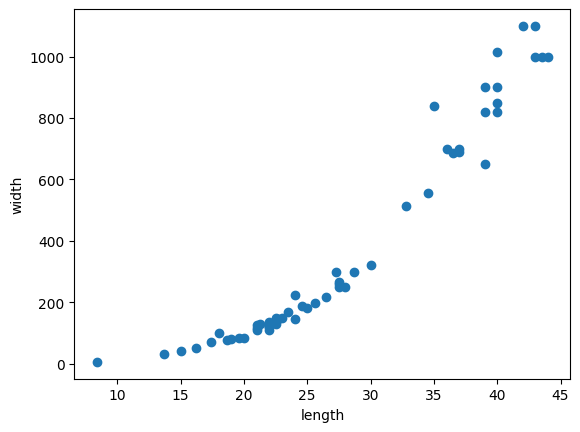

In [24]:
plt.scatter(perch_length,perch_weight)

plt.xlabel('length')
plt.ylabel('width')
plt.show()#일부러 곡선 형태로 데이터 준비함

### 3. 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(perch_length, perch_weight,
                                                  test_size=0.2,
                                                  random_state=1)

In [27]:
#총 56개중에 44개가 훈련 데이터
X_train.shape,  y_train.shape

((44,), (44,))

In [28]:
#총 56개중에 12개가 테스트 데이터
X_test.shape,  y_test.shape

((12,), (12,))

### 입력 데이터의 차원 변경
*훈련 및 테스트 데이터 (입력데이터)는 반드시 2차원이여야 한다.

In [29]:
X_train=X_train[...,np.newaxis]
X_train.shape 

(44, 1)

In [30]:
X_test=X_test[...,np.newaxis]
X_test.shape

(12, 1)

### 농어 길이 값 하나이기 때문에 표준화는 불필요하다.

In [31]:
## 다항 회귀 
#train_poly = np.column_stack((X_train,X_train**2))
#test_poly = np.column_stack((X_test,X_test**2))

#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(degree = 2,include_bias=False )
#poly.fit(X_train)
#train_poly = poly.transform(X_train)
#test_poly = poly.transform(X_test)
#interaction_only= True (x1 * x2 항 포함)
#include_bias=True (절편 포함)
#include_bias=False => array(['x0', 'x0^2'], dtype=object)

#변환된 다항 계수 확인
# poly.get_feature_names() 는 deprecated 됨. 
#poly.get_feature_names_out()#array(['1', 'x0', 'x0^2'], dtype=object)

#train_poly.shape, test_poly.shape

### 4. 모델 생성

#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LinearRegression

#knr=KNeighborsRegressor()
#knr.fit(X_train,y_train) # [2차원 입력 데이터, 1차원 레이블]

#lr = LinearRegression()
#lr.fit(train_poly,y_train)# [2차원 입력 데이터, 1차원 레이블]

#knr=KNeighborsRegressor()
#knr.fit(X_train,y_train) # [2차원 입력 데이터, 1차원 레이블]

lr = LinearRegression()
lr.fit(train_poly,y_train)# [2차원 입력 데이터, 1차원 레이블]

### 4. Pipeline

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [33]:
p_model = Pipeline([('poly',PolynomialFeatures(degree = 2,include_bias=False)),('linear',LinearRegression())])
p_model.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [34]:
p_model['poly'].get_feature_names_out() #pipeline 안의 요소에 접근

array(['x0', 'x0^2'], dtype=object)

### 5. 예측

In [36]:
#pred = knr.predict(X_test)
pred = p_model.predict(X_test)
pred

array([783.260329  ,  30.77833813, 783.260329  , 142.45739347,
       279.26947421, 279.26947421, 366.38332773, 578.02666107,
       839.55749615, 676.65249489, 839.55749615, 146.97203667])

### 6. 평가

* 분류에서는 종류를 예측하는 것이기 때문에 score 값이 정확도 (accurancy) 값이다. (맞힌 개수 / 전체 개수)
* 회귀에서는 score 값이 정확도 값이 아니고 결정계수 (Coefficeint of Determination, R^2)

In [ ]:
'''

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

결정계수 = 1 - u/v
         = 1 - ((y_true - y_pred)** 2).sum()/ ((y_true - y_true.mean()) ** 2).sum()
         = 1 - 예측값 분산 / 실제값 분산
         
         
   ==> 만약에 y_pred (예측값)이 y_true(실제값)에 가까워진다면 R2는 1에 가까워진다.
   따라서 만약에 R2가 1이면 예측값이 정확하게 실제 값과 일치한다는 의미이다.
   결국 결정 계수의 용도는 우리가 만든 모델 (모델에 의해서 예측값이 산출됨)이 
   사용중인 실제 Data에 잘 맞는지를 알려주는 척도이다. 
   
단점: 정확도처럼 직관적이지 않기 때문에 추가적인 평가 지표가 필요하다. 
-MSE, MAE, RMSE 등

residual(잔차) sum of squares (RSS)

분산(variance) => 편차(잔차) 제곱 평균 = RSS/n
         
'''

In [38]:
#knr.score(X_train,y_train) # 결정계수 값이다.
p_model.score(X_train,y_train) # 결정 계수 값이다.

0.9844644702299776

In [37]:
p_model.score(X_test,y_test)

0.916356266171839

### 7. R2를 대신할 회귀 평가지표 사용 , MAE , MSE, RMSE, R2
* 비용함수 (cost function), 손실함수 (loss function)? (실제값-예측값).sum() 최소가 되는 회귀계수를 찾는 함수 (경사 하강법 알고리즘 이용)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# y_pred = lr.predict(X_test)
y_pred=p_model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
'mae:{}, mse:{}, r2:{}'.format(mae,mse,r2)

'mae:65.68821349119177, mse:10170.192223128764, r2:0.916356266171839'

### 생성된 회귀식의 기울기(가중치, coef)와 절편 (bias,intercept) 알아보기 

In [41]:
#lr.coef_ , lr.intercept_
p_model['linear'].coef_ , p_model['linear'].intercept_

(array([-22.52508559,   0.99775003]), 144.16086417734118)

### 다음 회귀식이 생성됨
* y =  -22.52508559 * x + 0.99775003 * x**2 + 144.16086417734118

### 8. 새로운 데이터 이용한 농어무게 예측

In [42]:
#knr.predict([[50.0]])
#lr.predict([[50,50**2]])
p_model.predict([[50]]) # 2차항을 파이프 라인에서 만들어주기 때문에 1개만 넣으면됨

array([1512.28167153])

In [44]:
y_hat = -22.52508559 * 50 +  0.99775003 * 50**2 + 144.16086417734118
y_hat

1512.2816596773412

In [43]:
#knr.predict([[100.0]])
#lr.predict([[100,100**2]])
p_model.predict([[100]])

array([7869.15265272])

In [45]:
y_hat = -22.52508559 * 100 +  0.99775003 * 100**2 + 144.16086417734118
y_hat

7869.152605177341

### 시각화

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

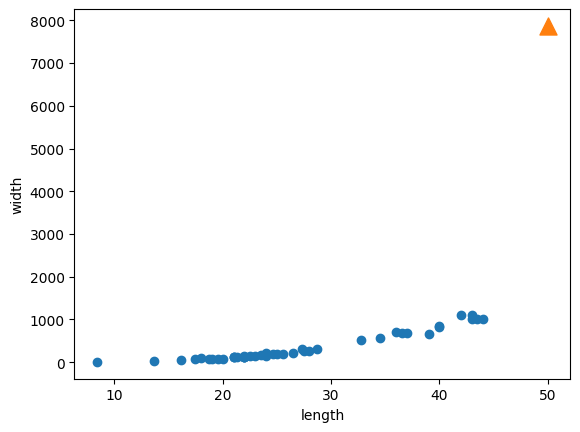

In [51]:
# lr.coef_  , lr.intercept_

plt.scatter(X_train , y_train)
plt.scatter(50, y_hat, marker="^", s=150)
plt.xlabel("length")
plt.ylabel("width")
plt.show()
